In [42]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [300]:
filename = 'merged_table.csv'

In [301]:
data = pd.read_csv(filename)

In [302]:
data['Category'] = [cat.split(">")[-2].strip() for cat in data['Category']]

In [303]:
category_list = data['Category']

In [304]:
category_price = data.groupby('Category',as_index=False).mean()

Category vs Sale Price Plot

In [305]:
objects = category_price['Category']
y_pos = np.arange(len(objects))
performance = category_price['Sale Price']

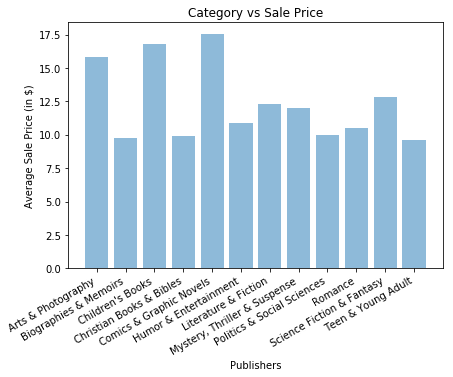

In [306]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 30,horizontalalignment='right')
#plt.xticks(y_pos, objects,horizontalalignment='right')
plt.ylabel('Average Sale Price (in $)')
plt.xlabel('Publishers')
plt.title('Category vs Sale Price') 
plt.savefig('./figures/price_vs_category.jpg', bbox_inches = 'tight')
plt.show()

Most expensive book categories

In [307]:
category_price_top10 = category_price.nlargest(10, 'Sale Price')

In [308]:
objects = category_price_top10['Category']
y_pos = np.arange(len(objects))
performance = category_price_top10['Sale Price']

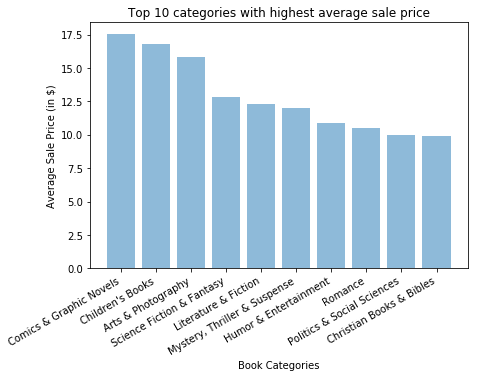

In [309]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 30,horizontalalignment='right')
plt.ylabel('Average Sale Price (in $)')
plt.xlabel('Book Categories')
plt.title('Top 10 categories with highest average sale price') 
plt.savefig('./figures/price_vs_category_top_10.jpg', bbox_inches = 'tight')
plt.show()

Least expensive book categories

In [310]:
category_price_bottom10 = category_price.nsmallest(10, 'Sale Price')
objects = category_price_bottom10['Category']
y_pos = np.arange(len(objects))
performance = category_price_bottom10['Sale Price']

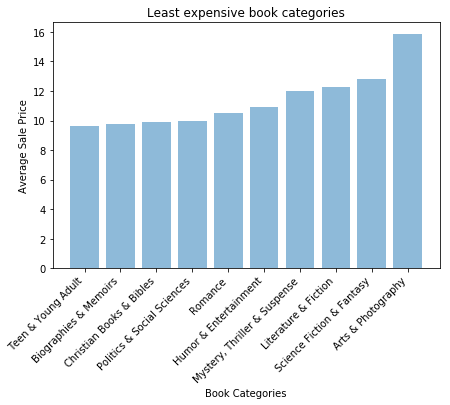

In [317]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 45,horizontalalignment='right')
plt.ylabel('Average Sale Price')
plt.title('Least expensive book categories') 
plt.xlabel('Book Categories')
plt.savefig('./figures/price_vs_category_bottom_10.jpg', bbox_inches = 'tight')
plt.show()

Sale Price vs Number of Books

In [312]:
data['Sale Price'].dropna().max()

96.65

In [320]:
data.groupby(pd.cut(data['Sale Price'],bins=[0,5,10,15,20,25,30,130])).count()

,Name,Sale Price,Category,Author,ISBN10,Pages,Publisher,Language,Dimensions,Weight,Rating
Sale Price,,,,,,,,,,,
"(0, 5]",8,8,8,8,8,8,8,8,8,8,8
"(5, 10]",224,224,224,224,224,224,224,224,224,224,224
"(10, 15]",149,149,149,149,149,149,149,149,149,149,148
"(15, 20]",64,64,64,64,64,64,64,64,63,64,61
"(20, 25]",24,24,24,24,24,23,24,24,24,24,22
"(25, 30]",7,7,7,7,7,7,7,7,7,7,6
"(30, 130]",9,9,9,9,9,9,9,9,9,9,9


In [321]:
price_books = data.groupby(pd.cut(data['Sale Price'],bins=[0,5,10,15,20,25,30,130])).count()
books = price_books['Name']
price_range = ['0-5','5-10','10-15','15-20','20-25','25-30','>30']

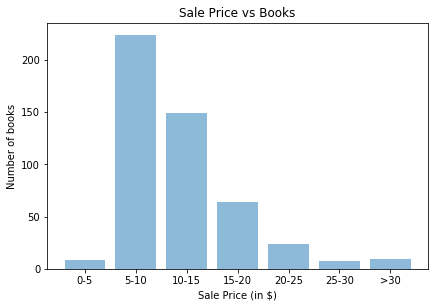

In [324]:
plt.bar(np.arange(len(books)), books, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(np.arange(len(books)), price_range,horizontalalignment='center')
plt.ylabel('Number of books')
plt.title('Sale Price vs Books') 
plt.xlabel('Sale Price (in $)')
plt.savefig('./figures/price_vs_num_books.jpg', bbox_inches = 'tight')
plt.show()

In [325]:
price = data['Sale Price'].dropna()

C:\Users\rahul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


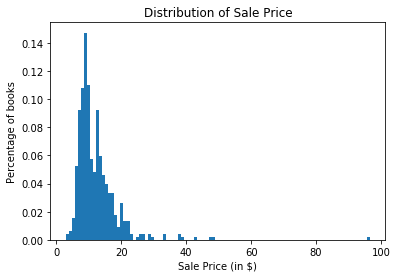

In [328]:
plt.hist(price,normed=True,bins=100)
plt.title('Distribution of Sale Price')
plt.ylabel('Percentage of books')
plt.xlabel('Sale Price (in $)')
plt.savefig('./figures/price_vs_num_books distribution.jpg', bbox_inches = 'tight')
plt.show()

Publisher vs Price

In [329]:
publisher_price = data

In [330]:
publisher_price['Publisher'] = [pub.split(';')[0].strip() for pub in publisher_price['Publisher']]
publisher_price= publisher_price.groupby('Publisher', as_index = False)['Name'].count()
publisher_price.rename(columns = {'Name':'Num_books'},inplace=True)

In [331]:
publisher_price

,Publisher,Num_books
0,Abrams ComicArts,1
1,Ace,16
2,Ace Books,1
3,Aladdin Paperbacks,1
4,Anchor,4
5,Atria Books,2
6,Atria/Emily Bestler Books,2
7,Avon,1
8,Ballantine Books,10
9,Bantam,19


In [332]:
publisher_price_top10 = publisher_price.nlargest(15, 'Num_books')

In [333]:
publisher_price_top10

,Publisher,Num_books
13,Berkley,32
22,Del Rey,27
65,Penguin Books,24
60,Orbit,22
24,Dell,20
9,Bantam,19
1,Ace,16
36,Grand Central Publishing,15
58,Minotaur Books,15
78,Scribner,14


In [334]:
objects = publisher_price_top10['Publisher']
y_pos = np.arange(len(objects))
performance = publisher_price_top10['Num_books']

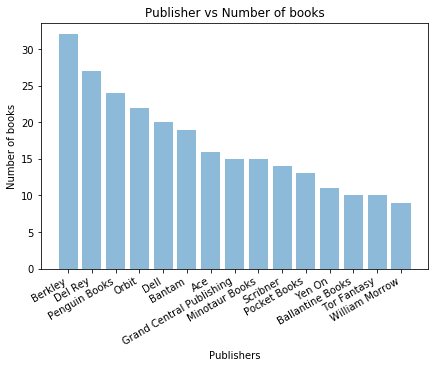

In [337]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 30,horizontalalignment='right')
#plt.xticks(y_pos, objects,horizontalalignment='right')
plt.ylabel('Number of books')
plt.title('Publisher vs Number of books') 
plt.savefig('./figures/publisher_vs_num_books.jpg', bbox_inches = 'tight')
plt.xlabel('Publishers')
plt.show()

In [352]:
category_books = data.groupby('Category',as_index=False)['Name'].count()
category_books.rename(columns = {'Name':'Num_books'},inplace=True)

In [353]:
category_books

,Category,Num_books
0,Arts & Photography,1
1,Biographies & Memoirs,1
2,Children's Books,2
3,Christian Books & Bibles,8
4,Comics & Graphic Novels,8
5,Humor & Entertainment,3
6,Literature & Fiction,235
7,"Mystery, Thriller & Suspense",151
8,Politics & Social Sciences,1
9,Romance,6


In [354]:
objects = category_books['Category']
y_pos = np.arange(len(objects))
performance = category_books['Num_books']

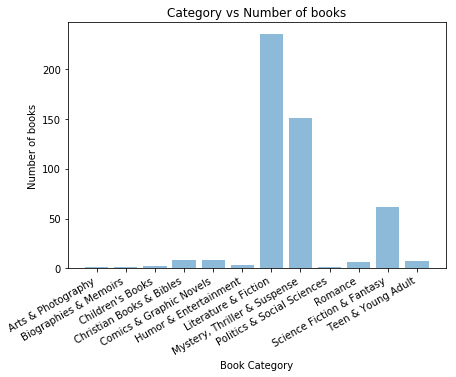

In [355]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 30,horizontalalignment='right')
#plt.xticks(y_pos, objects,horizontalalignment='right')
plt.ylabel('Number of books')
plt.title('Category vs Number of books') 
plt.savefig('./figures/category_vs_num_books.jpg', bbox_inches = 'tight')
plt.xlabel('Book Category')
plt.show()

In [358]:
lit_data = data[data.Category == 'Literature & Fiction']
lit_data.nsmallest(3, 'Sale Price')
lit_data.drop(columns = [])

,Name,Sale Price,Category,Author,ISBN10,Pages,Publisher,Language,Dimensions,Weight,Rating
410,Jane Eyre Bantam Classics,2.86,Literature & Fiction,"Bronte, Charlotte",553211404,493.0,Bantam Classics,English,4.2 x 0.8 x 6.9 inches,8.8 ounces,4.0
456,His Secret Son The Westmoreland Legacy,3.21,Literature & Fiction,"Jackson, Brenda",373838840,224.0,Harlequin Desire,English,4.1 x 0.6 x 6.6 inches,3.8 ounces,4.0
409,Thursdays at Eight,4.78,Literature & Fiction,Debbie Macomber,778330443,384.0,MIRA,English,4.2 x 1 x 6.6 inches,6.4 ounces,4.0


In [356]:
data

,Name,Sale Price,Category,Author,ISBN10,Pages,Publisher,Language,Dimensions,Weight,Rating
0,Origin,20.35,Literature & Fiction,"Brown, Dan",385514239,717.0,Doubleday,English,6.3 x 1.6 x 9.6 inches,1.7 pounds,4.0
1,We Were the Lucky Ones,8.97,Literature & Fiction,Georgia Hunter,399563091,416.0,Penguin Books,English,5.4 x 0.9 x 8.2 inches,11.4 ounces,4.0
2,Fahrenheit 451 Paperback,9.99,Politics & Social Sciences,Ray Bradbury,1451673310,256.0,Simon & Schuster,English,5.5 x 0.9 x 8.4 inches,6.2 ounces,4.0
3,"Sing, Unburied, Sing",21.24,Literature & Fiction,Jesmyn Ward,1501126067,304.0,Scribner,English,5.5 x 1.2 x 8.4 inches,1 pounds,4.0
4,Altered Carbon Takeshi Kovacs,12.98,Science Fiction & Fantasy,"Morgan, Richard K.",345457684,375.0,Del Rey,English,6.1 x 0.9 x 9.2 inches,12.8 ounces,4.0
5,Artemis,16.63,"Mystery, Thriller & Suspense","Weir, Andy",553448129,305.0,Crown,English,6.4 x 1.1 x 9.5 inches,1.2 pounds,3.0
6,Eleanor Oliphant Is Completely Fine,18.16,Literature & Fiction,Gail Honeyman,735220689,336.0,Pamela Dorman Books,English,6.3 x 1.2 x 9.3 inches,1.2 pounds,4.0
7,Everything I Never Told You Paperback,14.85,Literature & Fiction,"Ng, Celeste",143127551,297.0,Penguin Books,English,5.1 x 0.6 x 7.8 inches,8 ounces,4.0
8,The Rooster Bar (Hardcover),15.28,"Mystery, Thriller & Suspense",John Grisham,385541171,368.0,Doubleday,English,6.4 x 1.2 x 9.5 inches,1.4 pounds,3.0
9,Lord of the Flies Mass Market Paperback,8.89,Literature & Fiction,William Golding,399501487,224.0,Penguin Books,English,4.2 x 0.6 x 7.6 inches,4 ounces,3.0
